### Reqeusts 사용법
- 서버에 페이지 정보를 요청할 때

In [2]:
import requests as req

In [96]:
url = 'https://www.naver.com/'
res = req.get(url)

# <Response [200]> : 요청 성공 

<Response [200]>

In [97]:
# 페이지 정보 확인
res.text

'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\t\r\n\r\n\r\n\t\r\n\t\r\n\t\t\r\n\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\r\n\t\t\t\r\n\t\t\t\r\n\t\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\t\r\n\t\r\n\r\n<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n\r\n\r\n\r\n\r\n\r\n\r\n<meta property="me2:image" content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg"/>\r\n<meta property="me2:post_tag" content="네이버영화 "/>\r\n<meta property="me2:category1" content="네이버영화"/>\r\n<meta property="me2:category2" content=""/>\r\n\r\n\r\n\r\n\r\n\r\n\t\r\n\t\r\n\t\t<meta property="og:title" content="랭킹 : 네이버 영화"/>\r\n\t\t\r\n\t\t\t\r\n\t\t\t\t<meta property="og

### BeautifulSoup 사용법
- 내가 원하는 컨텐츠만 추출할 때

In [6]:
from bs4 import BeautifulSoup as bs

In [8]:
# BeautifulSoup 라이브러리에서 사용할 수 있도록 파싱
# bs(파싱할 데이터, '파싱방법')
soup = bs(res.text, 'lxml')

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
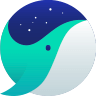
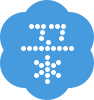

In [9]:
soup

In [12]:
result = soup.select('a.nav')

In [16]:
for i in result:
    print(i.text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV
사전
뉴스
증권
부동산
지도
VIBE
도서
웹툰


### 멜론 페이지

In [18]:
url = 'https://www.melon.com/'
res = req.get(url)
res

# <Response [406]> : 요청 실패

<Response [406]>

In [45]:
# 컴퓨터가 아닌 사람으로 속이는 작업
h = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'}

In [46]:
url = 'https://www.melon.com/'
res = req.get(url, headers = h)
res

<Response [200]>

In [47]:
# 파싱 
soup  = bs(res.text, 'lxml')

In [49]:
soup.select('span.menu_bg')

[<span class="menu_bg menu01">멜론차트</span>,
 <span class="menu_bg menu02">최신 음악</span>,
 <span class="menu_bg menu03">장르 음악</span>,
 <span class="menu_bg menu04">멜론DJ</span>,
 <span class="menu_bg menu05">멜론TV</span>,
 <span class="menu_bg menu06">스타포스트</span>,
 <span class="menu_bg menu07">매거진</span>,
 <span class="menu_bg menu08">뮤직어워드</span>,
 <span class="menu_bg menu10">어학</span>,
 <span class="menu_bg menu09">마이뮤직</span>]

### 멜론차트 가수, 노래 제목 가져오기

In [99]:
# 노래 제목
url = 'https://www.melon.com/chart/index.htm'
res = req.get(url, headers = h)

# 파싱
soup = bs(res.text, 'lxml')
title = soup.select('div.ellipsis.rank01 > span > a')
title
#div.ellipsis.rank01

[<a href="javascript:melon.play.playSong('1000002721',35595136);" title="새삥 (Prod. ZICO) (Feat. 호미들) 재생">새삥 (Prod. ZICO) (Feat. 호미들)</a>,
 <a href="javascript:melon.play.playSong('1000002721',35546497);" title="After LIKE 재생">After LIKE</a>,
 <a href="javascript:melon.play.playSong('1000002721',35454425);" title="Attention 재생">Attention</a>,
 <a href="javascript:melon.play.playSong('1000002721',35640077);" title="Shut Down 재생">Shut Down</a>,
 <a href="javascript:melon.play.playSong('1000002721',35542908);" title="Pink Venom 재생">Pink Venom</a>,
 <a href="javascript:melon.play.playSong('1000002721',35454426);" title="Hype boy 재생">Hype boy</a>,
 <a href="javascript:melon.play.playSong('1000002721',34847378);" title="LOVE DIVE 재생">LOVE DIVE</a>,
 <a href="javascript:melon.play.playSong('1000002721',35383397);" title="그때 그 순간 그대로 (그그그) 재생">그때 그 순간 그대로 (그그그)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34061322);" title="사랑은 늘 도망가 재생">사랑은 늘 도망가</a>,
 <a href="javascript:melon.p

In [100]:
# strip() : 문자열 및 공백 제거
# rank01 까지만 썼을 땐 공백이 나오는데 그걸 i.text.strip으로 지울 수 있다.
for i in title:
    print(i.text)

새삥 (Prod. ZICO) (Feat. 호미들)
After LIKE
Attention
Shut Down
Pink Venom
Hype boy
LOVE DIVE
그때 그 순간 그대로 (그그그)
사랑은 늘 도망가
FOREVER 1
Cookie
딱 10CM만
우리들의 블루스
보고싶었어
LAW (Prod. Czaer)
그라데이션
다시 만날 수 있을까
SNEAKERS
TOMBOY
정이라고 하자 (Feat. 10CM)
사랑인가 봐
Rush Hour (Feat. j-hope of BTS)
무지개
이제 나만 믿어요
나의 X에게
내가 아니라도
That That (prod. & feat. SUGA of BTS)
아버지
Monologue
해요 (2022)
POP!
A bientot
내 기쁨은 너가 벤틀리를 끄는 거야
손이 참 곱던 그대
ELEVEN
사랑해 진짜
인생찬가
도깨비불 (Illusion)
연애편지
FEARLESS
사랑역
보금자리
사랑해요 그대를
That's Hilarious
Love story
질주 (2 Baddies)
취중고백
LOVE me
Talk that Talk
너의 모든 순간
사랑한다고 말해줘
다정히 내 이름을 부르면
I Don't Think That I Like Her
봄여름가을겨울 (Still Life)
통화연결음
Girls
새벽에 걸려온 너의 전화는
Dynamite
STAY
스티커 사진
Left and Right (Feat. Jung Kook of BTS)
모든 날, 모든 순간 (Every day, Every Moment)
strawberry moon
신호등
Feel My Rhythm
I Ain't Worried
INVU
드라마
바보에게 바보가 (웹툰 '연애의 발견' X 이석훈)
Butter
내 손을 잡아
Off My Face
밤하늘의 별을(2020)
Ready For Love
열이올라요 (Heart Burn)
그중에 그대를 만나
Yet To Come
주저하는 연인들을 위해
아무래도 난
윤슬 (Gold Dust)
늦은 밤 헤어지긴 너무 아쉬워
GANADAR

In [101]:
len(title)

100

In [102]:
singer = soup.select('div.ellipsis.rank02 > a:nth-child(1)')
singer

[<a href="javascript:melon.link.goArtistDetail('602056');" title="지코 (ZICO) - 페이지 이동">지코 (ZICO)</a>,
 <a href="javascript:melon.link.goArtistDetail('3055146');" title="IVE (아이브) - 페이지 이동">IVE (아이브)</a>,
 <a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a>,
 <a href="javascript:melon.link.goArtistDetail('995169');" title="BLACKPINK - 페이지 이동">BLACKPINK</a>,
 <a href="javascript:melon.link.goArtistDetail('995169');" title="BLACKPINK - 페이지 이동">BLACKPINK</a>,
 <a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a>,
 <a href="javascript:melon.link.goArtistDetail('3055146');" title="IVE (아이브) - 페이지 이동">IVE (아이브)</a>,
 <a href="javascript:melon.link.goArtistDetail('3110856');" title="WSG워너비 (가야G) - 페이지 이동">WSG워너비 (가야G)</a>,
 <a href="javascript:melon.link.goArtistDetail('994944');" title="임영웅 - 페이지 이동">임영웅</a>,
 <a href="javascript:melon.link.goArtistDetail('228069');" title="소녀시대 (GIRLS' GENERATION) - 페이지

In [103]:
for i in singer:
    print(i.text)

지코 (ZICO)
IVE (아이브)
NewJeans
BLACKPINK
BLACKPINK
NewJeans
IVE (아이브)
WSG워너비 (가야G)
임영웅
소녀시대 (GIRLS' GENERATION)
NewJeans
10CM
임영웅
WSG워너비 (4FIRE)
윤미래
10CM
임영웅
ITZY (있지)
(여자)아이들
BIG Naughty (서동현)
멜로망스
Crush
임영웅
임영웅
경서
주호
싸이 (PSY)
임영웅
테이
#안녕
나연 (TWICE)
임영웅
김승민
임영웅
IVE (아이브)
임영웅
임영웅
aespa
임영웅
LE SSERAFIM (르세라핌)
임영웅
임영웅
임영웅
Charlie Puth
볼빨간사춘기
NCT 127
김민석 (멜로망스)
BE'O (비오)
TWICE (트와이스)
성시경
탑현
경서예지
Charlie Puth
BIGBANG (빅뱅)
보라미유
aespa
한동근
방탄소년단
The Kid LAROI
21학번
Charlie Puth
폴킴
아이유
이무진
Red Velvet (레드벨벳)
OneRepublic
태연 (TAEYEON)
아이유
이석훈
방탄소년단
아이유
Justin Bieber
경서
BLACKPINK
선미
김호중
방탄소년단
잔나비
주시크 (Joosiq)
NCT 127
케이시 (Kassy)
박재범
우원재
aespa
김호중
방탄소년단
방탄소년단
(여자)아이들
NCT 127
MSG워너비(M.O.M)
태연 (TAEYEON)
주시크 (Joosiq)
김호중
YENA (최예나)
BLACKPINK
NMIXX
sokodomo
임재현
NCT 127
김호중


In [104]:
len(singer)

100

In [105]:
title_list = []
singer_list = []
rank_list = []

for i in range(len(title)):
    title_list.append(title[i].text)
    singer_list.append(singer[i].text)
    rank_list.append(i+1)

In [106]:
import pandas as pd

In [107]:
dic = {'노래제목': title_list, '가수' : singer_list, '순위': rank_list}

In [108]:
df=pd.DataFrame(dic)
df

,노래제목,가수,순위
0,새삥 (Prod. ZICO) (Feat. 호미들),지코 (ZICO),1
1,After LIKE,IVE (아이브),2
2,Attention,NewJeans,3
3,Shut Down,BLACKPINK,4
4,Pink Venom,BLACKPINK,5
...,...,...,...
95,DICE,NMIXX,96
96,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo,97
97,고백하는 취한밤에 (Prod. 2soo),임재현,98
98,Designer,NCT 127,99


In [93]:
df = df.set_index('순위')

In [94]:
df

,노래제목,가수
순위,,
1,\n새삥 (Prod. ZICO) (Feat. 호미들)\n,지코 (ZICO)
2,\nAfter LIKE\n,IVE (아이브)
3,\nShut Down\n,BLACKPINK
4,\nAttention\n,NewJeans
5,\nPink Venom\n,BLACKPINK
...,...,...
96,\nWeekend\n,태연 (TAEYEON)
97,\nDesigner\n,NCT 127
98,\n빛이 나는 사람\n,김호중
